<a href="https://colab.research.google.com/github/sindhutej-6/dl_programs/blob/main/7_dl_satvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 667s 2s/step - accuracy: 0.3765 - loss: 1.7645 - val_accuracy: 0.5448 - val_loss: 1.3189
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 623s 2s/step - accuracy: 0.5275 - loss: 1.3503 - val_accuracy: 0.5644 - val_loss: 1.2406
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 717s 2s/step - accuracy: 0.5585 - loss: 1.2673 - val_accuracy: 0.5789 - val_loss: 1.2055
Train Acc: 55.84% | Test Acc: 57.89%


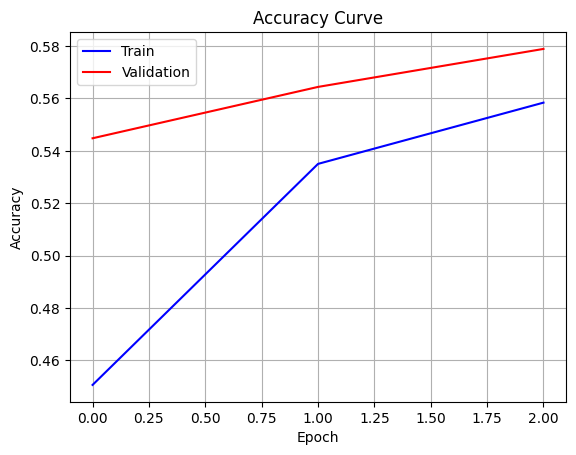

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
Pred: airplane | True: ship


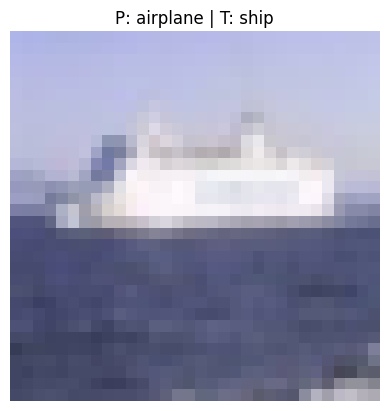

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# -------------------------------
# 1️⃣ Load and Preprocess CIFAR-10 Dataset
# -------------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Class labels
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# -------------------------------
# 2️⃣ Load Pretrained VGG16 (Without Top Layers)
# -------------------------------
base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze convolutional base layers
for layer in base.layers:
    layer.trainable = False

# -------------------------------
# 3️⃣ Build the Model
# -------------------------------
model = Sequential([
    base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# -------------------------------
# 4️⃣ Compile the Model
# -------------------------------
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# -------------------------------
# 5️⃣ Train the Model
# -------------------------------
history = model.fit(
    x_train, y_train,
    epochs=3,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)

# -------------------------------
# 6️⃣ Print Final Accuracy
# -------------------------------
print(f"Train Acc: {history.history['accuracy'][-1]*100:.2f}% | "
      f"Test Acc: {history.history['val_accuracy'][-1]*100:.2f}%")

# -------------------------------
# 7️⃣ Plot Training vs Validation Accuracy
# -------------------------------
plt.plot(history.history['accuracy'], 'b', label='Train')
plt.plot(history.history['val_accuracy'], 'r', label='Validation')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# -------------------------------
# 8️⃣ Predict Random Test Image
# -------------------------------
i = np.random.randint(len(x_test))
pred = np.argmax(model.predict(x_test[i][None]))
true = np.argmax(y_test[i])

print(f"Pred: {classes[pred]} | True: {classes[true]}")

plt.imshow(x_test[i])
plt.title(f"P: {classes[pred]} | T: {classes[true]}")
plt.axis('off')
plt.show()
